# IMPORTACIÓN DE LIBRERÍAS

Importamos las librerias necesarias para comenzar a trabajar con los datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
import joblib
from sklearn import tree
from sklearn.tree import export_text
from xgboost import XGBClassifier
from subprocess import check_call
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.tree import export_text
from xgboost import XGBClassifier
from subprocess import check_call
from IPython.display import Image as PImage

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import metrics

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# IMPORTACIÓN DE LOS SETS DE DATOS

Importamos la compilación de sets de datos a utilizar y vemos sus primeros registros

In [11]:
import pandas as pd

# Especifica la ruta del archivo CSV
file_path = 'D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv'

# Cargar el CSV en un DataFrame
df_mora_prestamos = pd.read_csv(file_path)

In [12]:
import pandas as pd

# Supongamos que df_mora_prestamos es tu DataFrame
# Si no has cargado el DataFrame, puedes hacerlo de la siguiente manera:
# df_mora_prestamos = pd.read_csv('tu_archivo.csv')

# Contar la cantidad de registros y variables
num_registros = df_mora_prestamos.shape[0]  # Número de filas
num_variables = df_mora_prestamos.shape[1]  # Número de columnas

# Imprimir los resultados
print(f"Cantidad de registros: {num_registros}")
print(f"Cantidad de variables: {num_variables}")

Cantidad de registros: 1626264
Cantidad de variables: 32


# 3. ANALISIS DE CARACTERISTICA POR TIPO DE TASA

Analisis de el tipo de tasas que tenia el conjunto de datos:
- Tasa Fija = 0
- Tasa Mixta = 1
- Sin Interes (A tasa cero) = 2
- Tasa Variable = 3

In [16]:
print(df_mora_prestamos['Tasa_PrestamosPersonales'].value_counts())

Tasa_PrestamosPersonales
0    1020730
1     382376
3     216733
2       6425
Name: count, dtype: int64


## Partición del conjunto de datos

Separar del conjunto de datos los registros de tasa variable

In [21]:
import pandas as pd


# Filtrar solo los registros con Tasa_PrestamosPersonales = 3
df_tasavariable = df_mora_prestamos[df_mora_prestamos['Tasa_PrestamosPersonales'] == 3]

# Guardar el nuevo dataset filtrado
df_tasavariable.to_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_tasasvariable.csv', index=False)

# Mostrar información del filtrado
print(f"Registros originales: {len(df_mora_prestamos)}")
print(f"Registros filtrados: {len(df_tasavariable)}")
print(f"\nPorcentaje de registros mantenidos: {(len(df_tasavariable)/len(df_mora_prestamos))*100:.2f}%")

Registros originales: 1626264
Registros filtrados: 216733

Porcentaje de registros mantenidos: 13.33%


Separar del conjunto de datos los registros de tasa Fija

In [24]:
import pandas as pd


# Filtrar solo los registros con Tasa_PrestamosPersonales = 3
df_tasafija = df_mora_prestamos[df_mora_prestamos['Tasa_PrestamosPersonales'] == 0]

# Guardar el nuevo dataset filtrado
df_tasafija.to_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_tasafijas.csv', index=False)

# Mostrar información del filtrado
print(f"Registros originales: {len(df_mora_prestamos)}")
print(f"Registros tasafijas: {len(df_tasafija)}")
print(f"\nPorcentaje de registros mantenidos: {(len(df_tasafija)/len(df_mora_prestamos))*100:.2f}%")

Registros originales: 1626264
Registros tasafijas: 1020730

Porcentaje de registros mantenidos: 62.77%


## Distribución de los registros (Morosos y no Morosos) por tipo de tasa

Distribución de la Morosidad en los registros con tasa variable

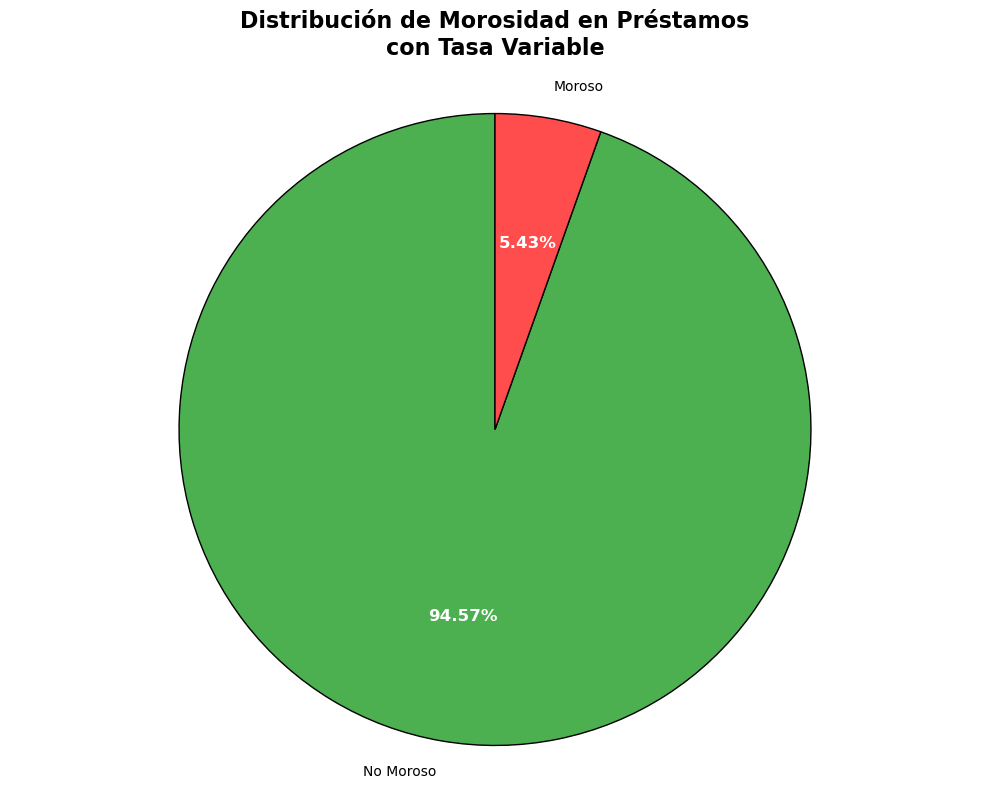


Estadísticas:
Total de préstamos: 216733
No Morosos: 204956 (94.57%)
Morosos: 11777 (5.43%)


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset filtrado
df_tasavariable = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_tasasvariable.csv')

# Calcular el conteo de morosidad
conteo_morosidad = df_tasavariable['Morosidad'].value_counts()
valores = conteo_morosidad.values
etiquetas = ['No Moroso' if i == 0 else 'Moroso' for i in conteo_morosidad.index]

# Asignar colores: Rojo para "Moroso" y Verde para "No Moroso"
colores = ['#4CAF50', '#FF4C4C']

# Crear el gráfico de torta
fig, ax = plt.subplots(figsize=(10, 8))
autotexts = plt.pie(valores, 
                    labels=etiquetas, 
                    autopct='%.2f%%', 
                    colors=colores, 
                    startangle=90, 
                    wedgeprops={'edgecolor': 'black'})

# Ajustar propiedades de las etiquetas dentro del gráfico
for autotext in autotexts[2]:  
    autotext.set_color('white')  
    autotext.set_fontsize(12)  
    autotext.set_fontweight('bold')  

# Añadir título
plt.title("Distribución de Morosidad en Préstamos\ncon Tasa Variable", 
          fontsize=16, 
          fontweight='bold', 
          pad=20)

plt.axis('equal')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Imprimir estadísticas
total = len(df_tasavariable)
morosos = conteo_morosidad[1] if 1 in conteo_morosidad else 0
no_morosos = conteo_morosidad[0] if 0 in conteo_morosidad else 0

print("\nEstadísticas:")
print(f"Total de préstamos: {total}")
print(f"No Morosos: {no_morosos} ({(no_morosos/total)*100:.2f}%)")
print(f"Morosos: {morosos} ({(morosos/total)*100:.2f}%)")

Distribución de la Morosidad en los registros con tasa Fija

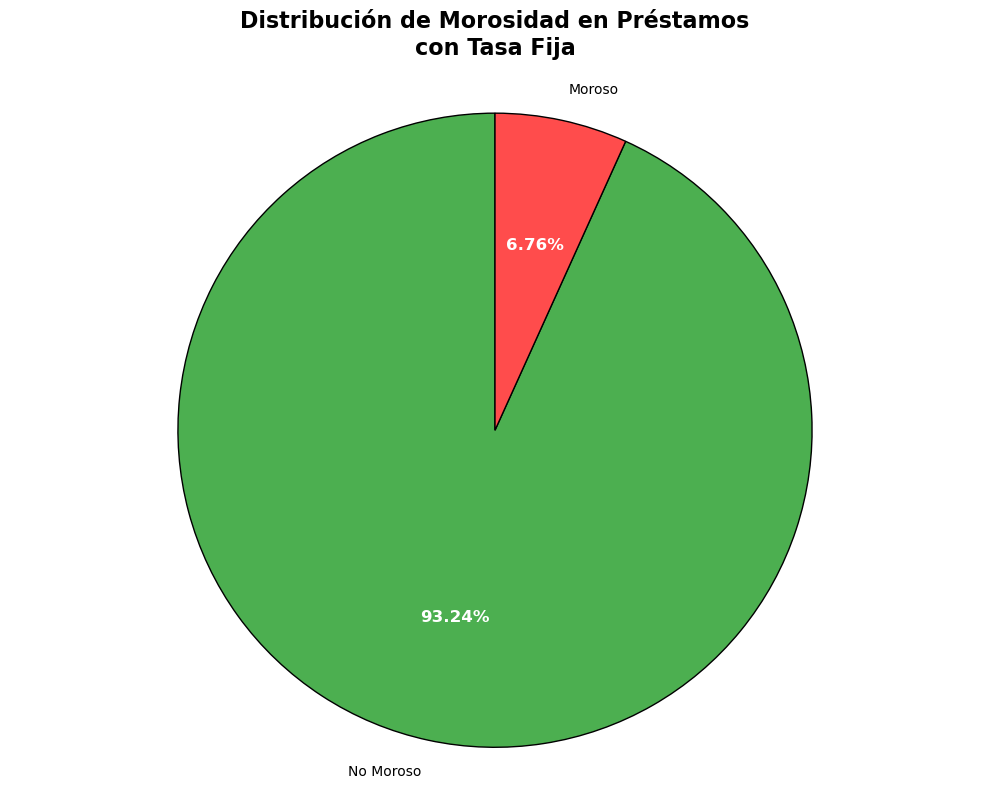


Estadísticas:
Total de préstamos: 1020730
No Morosos: 951729 (93.24%)
Morosos: 69001 (6.76%)


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset filtrado
df_tasafija = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_tasafijas.csv')

# Calcular el conteo de morosidad
conteo_morosidad = df_tasafija['Morosidad'].value_counts()
valores = conteo_morosidad.values
etiquetas = ['No Moroso' if i == 0 else 'Moroso' for i in conteo_morosidad.index]

# Asignar colores: Rojo para "Moroso" y Verde para "No Moroso"
colores = ['#4CAF50', '#FF4C4C']

# Crear el gráfico de torta
fig, ax = plt.subplots(figsize=(10, 8))
autotexts = plt.pie(valores, 
                    labels=etiquetas, 
                    autopct='%.2f%%', 
                    colors=colores, 
                    startangle=90, 
                    wedgeprops={'edgecolor': 'black'})

# Ajustar propiedades de las etiquetas dentro del gráfico
for autotext in autotexts[2]:  
    autotext.set_color('white')  
    autotext.set_fontsize(12)  
    autotext.set_fontweight('bold')  

# Añadir título
plt.title("Distribución de Morosidad en Préstamos\ncon Tasa Fija", 
          fontsize=16, 
          fontweight='bold', 
          pad=20)

plt.axis('equal')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Imprimir estadísticas
total = len(df_tasafija)
morosos = conteo_morosidad[1] if 1 in conteo_morosidad else 0
no_morosos = conteo_morosidad[0] if 0 in conteo_morosidad else 0

print("\nEstadísticas:")
print(f"Total de préstamos: {total}")
print(f"No Morosos: {no_morosos} ({(no_morosos/total)*100:.2f}%)")
print(f"Morosos: {morosos} ({(morosos/total)*100:.2f}%)")

## Busqueda de los mejores hiperparametros aplicando LightGBM

Modelo LightGBM solo conjunto de datos de tasa variable

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Cargar dataset
df_tasavariable = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_tasasvariable.csv')

# Separar características y variable objetivo
X = df_tasavariable.drop('Morosidad', axis=1)
y = df_tasavariable['Morosidad']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Definir el espacio de búsqueda de hiperparámetros
param_distributions = {
    'n_estimators': np.arange(100, 1000, 100),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 3, 5, 7, 9],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [5, 10, 20, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Configurar el modelo base
model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    random_state=42,
    verbose=-1
)

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Realizar la búsqueda
print("Iniciando búsqueda de hiperparámetros...")
random_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y score
print("\nMejores parámetros encontrados:")
for param, value in random_search.best_params_.items():
    print(f"{param}: {value}")
print(f"\nMejor score (ROC-AUC): {random_search.best_score_:.4f}")

# Entrenar el modelo con los mejores parámetros
best_model = lgb.LGBMClassifier(**random_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calcular métricas
print("\nMétricas en conjunto de prueba:")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Guardar los mejores parámetros
pd.DataFrame([random_search.best_params_]).to_csv('mejores_parametros_lightgbm_tv.csv', index=False)

Iniciando búsqueda de hiperparámetros...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Mejores parámetros encontrados:
subsample: 1.0
reg_lambda: 0.1
reg_alpha: 0.1
num_leaves: 127
n_estimators: 500
min_child_samples: 50
max_depth: -1
learning_rate: 0.05
colsample_bytree: 0.6

Mejor score (ROC-AUC): 0.9994

Métricas en conjunto de prueba:
ROC-AUC: 0.9996
Precision: 0.9886
Recall: 0.9609
F1-Score: 0.9746
Accuracy: 0.9973


Modelo LightGBM solo conjunto de datos de tasa Fija

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Cargar dataset
df_tasafija = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_tasafijas.csv')

# Separar características y variable objetivo
X = df_tasafija.drop('Morosidad', axis=1)
y = df_tasafija['Morosidad']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Definir el espacio de búsqueda de hiperparámetros
param_distributions = {
    'n_estimators': np.arange(100, 1000, 100),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 3, 5, 7, 9],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [5, 10, 20, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Configurar el modelo base
model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    random_state=42,
    verbose=-1
)

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Realizar la búsqueda
print("Iniciando búsqueda de hiperparámetros...")
random_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y score
print("\nMejores parámetros encontrados:")
for param, value in random_search.best_params_.items():
    print(f"{param}: {value}")
print(f"\nMejor score (ROC-AUC): {random_search.best_score_:.4f}")

# Entrenar el modelo con los mejores parámetros
best_model = lgb.LGBMClassifier(**random_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calcular métricas
print("\nMétricas en conjunto de prueba:")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Guardar los mejores parámetros
pd.DataFrame([random_search.best_params_]).to_csv('mejores_parametros_lightgbm_tf.csv', index=False)

Iniciando búsqueda de hiperparámetros...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Mejores parámetros encontrados:
subsample: 1.0
reg_lambda: 0.1
reg_alpha: 0.1
num_leaves: 127
n_estimators: 500
min_child_samples: 50
max_depth: -1
learning_rate: 0.05
colsample_bytree: 0.6

Mejor score (ROC-AUC): 0.9999

Métricas en conjunto de prueba:
ROC-AUC: 0.9999
Precision: 0.9927
Recall: 0.9823
F1-Score: 0.9874
Accuracy: 0.9983


## Control Cruzado con aplicando de los mejores hiperparametros al modelo LightGBM

Cross Validation de los mejores hiperparametros de LightGBM - Tasa Variable

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Cargar datos
df_tasavariable = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_tasasvariable.csv')
X = df_tasavariable.drop('Morosidad', axis=1)
y = df_tasavariable['Morosidad']

# Configurar los mejores hiperparámetros
best_params = {
    'subsample': 1.0,
    'reg_lambda': 0.1,
    'reg_alpha': 0.1,
    'num_leaves': 127,
    'n_estimators': 500,
    'min_child_samples': 50,
    'max_depth': -1,
    'learning_rate': 0.05,
    'colsample_bytree': 0.5,
    'random_state': 42
}

# Configurar la validación cruzada
n_splits = 5
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para almacenar resultados
cv_scores = {
    'roc_auc': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'accuracy': []
}

# Realizar validación cruzada
print(f"Iniciando validación cruzada con {n_splits} folds...")

for fold, (train_idx, val_idx) in enumerate(cv.split(X), 1):
    print(f"\nFold {fold}/{n_splits}")
    
    # Dividir datos
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Entrenar modelo
    model = lgb.LGBMClassifier(**best_params)
    model.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Calcular métricas
    cv_scores['roc_auc'].append(roc_auc_score(y_val, y_pred_proba))
    cv_scores['precision'].append(precision_score(y_val, y_pred))
    cv_scores['recall'].append(recall_score(y_val, y_pred))
    cv_scores['f1'].append(f1_score(y_val, y_pred))
    cv_scores['accuracy'].append(accuracy_score(y_val, y_pred))
    
    # Imprimir métricas del fold actual
    print(f"\nMétricas del Fold {fold}:")
    print(f"ROC-AUC: {cv_scores['roc_auc'][-1]:.4f}")
    print(f"Precision: {cv_scores['precision'][-1]:.4f}")
    print(f"Recall: {cv_scores['recall'][-1]:.4f}")
    print(f"F1-Score: {cv_scores['f1'][-1]:.4f}")
    print(f"Accuracy: {cv_scores['accuracy'][-1]:.4f}")

# Calcular estadísticas de las métricas
cv_stats = {}
for metric in cv_scores:
    cv_stats[metric] = {
        'mean': np.mean(cv_scores[metric]),
        'std': np.std(cv_scores[metric]),
        'min': np.min(cv_scores[metric]),
        'max': np.max(cv_scores[metric])
    }

# Crear directorio para resultados
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
result_dir = f'D:/Tesis/Definitivos/nuevo/lightgbm_cv_results_{timestamp}'
os.makedirs(result_dir, exist_ok=True)

# Visualizar distribución de métricas
plt.figure(figsize=(12, 6))
metrics_df = pd.DataFrame(cv_scores)
sns.boxplot(data=metrics_df)
plt.title('Distribución de Métricas en Cross Validation')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{result_dir}/cv_metrics_distribution.png')
plt.close()

# Imprimir resumen de resultados
print("\nResumen de Cross Validation:")
print("="*50)
for metric, stats in cv_stats.items():
    print(f"\n{metric.upper()}:")
    print(f"Media: {stats['mean']:.4f} (±{stats['std']:.4f})")
    print(f"Rango: [{stats['min']:.4f} - {stats['max']:.4f}]")

# Guardar resultados
results = {
    'hyperparameters': best_params,
    'cv_scores': cv_scores,
    'cv_stats': cv_stats
}

import json
with open(f'{result_dir}/cv_results.json', 'w') as f:
    json.dump(results, f, indent=4)

# Crear tabla de resultados en formato CSV
cv_results_df = pd.DataFrame({
    'Metric': list(cv_stats.keys()),
    'Mean': [stats['mean'] for stats in cv_stats.values()],
    'Std': [stats['std'] for stats in cv_stats.values()],
    'Min': [stats['min'] for stats in cv_stats.values()],
    'Max': [stats['max'] for stats in cv_stats.values()]
})
cv_results_df.to_csv(f'{result_dir}/cv_results.csv', index=False)

print(f"\nResultados guardados en: {result_dir}")

Iniciando validación cruzada con 5 folds...

Fold 1/5

Métricas del Fold 1:
ROC-AUC: 0.9995
Precision: 0.9883
Recall: 0.9623
F1-Score: 0.9751
Accuracy: 0.9973

Fold 2/5

Métricas del Fold 2:
ROC-AUC: 0.9994
Precision: 0.9907
Recall: 0.9629
F1-Score: 0.9766
Accuracy: 0.9975

Fold 3/5

Métricas del Fold 3:
ROC-AUC: 0.9995
Precision: 0.9827
Recall: 0.9680
F1-Score: 0.9753
Accuracy: 0.9973

Fold 4/5

Métricas del Fold 4:
ROC-AUC: 0.9994
Precision: 0.9836
Recall: 0.9617
F1-Score: 0.9725
Accuracy: 0.9970

Fold 5/5

Métricas del Fold 5:
ROC-AUC: 0.9997
Precision: 0.9880
Recall: 0.9689
F1-Score: 0.9784
Accuracy: 0.9976

Resumen de Cross Validation:

ROC_AUC:
Media: 0.9995 (±0.0001)
Rango: [0.9994 - 0.9997]

PRECISION:
Media: 0.9866 (±0.0030)
Rango: [0.9827 - 0.9907]

RECALL:
Media: 0.9648 (±0.0030)
Rango: [0.9617 - 0.9689]

F1:
Media: 0.9756 (±0.0019)
Rango: [0.9725 - 0.9784]

ACCURACY:
Media: 0.9974 (±0.0002)
Rango: [0.9970 - 0.9976]

Resultados guardados en: D:/Tesis/Definitivos/nuevo/lightg

Cross Validation de los mejores hiperparametros de LightGBM - Tasa Fija

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Cargar datos
df_tasafija = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_TasaFijas.csv')
X = df_tasafija.drop('Morosidad', axis=1)
y = df_tasafija['Morosidad']

# Configurar los mejores hiperparámetros
best_params = {
    'subsample': 1.0,
    'reg_lambda': 0.1,
    'reg_alpha': 0.1,
    'num_leaves': 127,
    'n_estimators': 500,
    'min_child_samples': 50,
    'max_depth': -1,
    'learning_rate': 0.05,
    'colsample_bytree': 0.6,
    'random_state': 42
}

# Configurar la validación cruzada
n_splits = 5
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para almacenar resultados
cv_scores = {
    'roc_auc': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'accuracy': []
}

# Realizar validación cruzada
print(f"Iniciando validación cruzada con {n_splits} folds...")

for fold, (train_idx, val_idx) in enumerate(cv.split(X), 1):
    print(f"\nFold {fold}/{n_splits}")
    
    # Dividir datos
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Entrenar modelo
    model = lgb.LGBMClassifier(**best_params)
    model.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Calcular métricas
    cv_scores['roc_auc'].append(roc_auc_score(y_val, y_pred_proba))
    cv_scores['precision'].append(precision_score(y_val, y_pred))
    cv_scores['recall'].append(recall_score(y_val, y_pred))
    cv_scores['f1'].append(f1_score(y_val, y_pred))
    cv_scores['accuracy'].append(accuracy_score(y_val, y_pred))
    
    # Imprimir métricas del fold actual
    print(f"\nMétricas del Fold {fold}:")
    print(f"ROC-AUC: {cv_scores['roc_auc'][-1]:.4f}")
    print(f"Precision: {cv_scores['precision'][-1]:.4f}")
    print(f"Recall: {cv_scores['recall'][-1]:.4f}")
    print(f"F1-Score: {cv_scores['f1'][-1]:.4f}")
    print(f"Accuracy: {cv_scores['accuracy'][-1]:.4f}")

# Calcular estadísticas de las métricas
cv_stats = {}
for metric in cv_scores:
    cv_stats[metric] = {
        'mean': np.mean(cv_scores[metric]),
        'std': np.std(cv_scores[metric]),
        'min': np.min(cv_scores[metric]),
        'max': np.max(cv_scores[metric])
    }

# Crear directorio para resultados
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
result_dir = f'D:/Tesis/Definitivos/nuevo/lightgbm_cv_results_{timestamp}'
os.makedirs(result_dir, exist_ok=True)

# Visualizar distribución de métricas
plt.figure(figsize=(12, 6))
metrics_df = pd.DataFrame(cv_scores)
sns.boxplot(data=metrics_df)
plt.title('Distribución de Métricas en Cross Validation')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{result_dir}/cv_metrics_distribution.png')
plt.close()

# Imprimir resumen de resultados
print("\nResumen de Cross Validation:")
print("="*50)
for metric, stats in cv_stats.items():
    print(f"\n{metric.upper()}:")
    print(f"Media: {stats['mean']:.4f} (±{stats['std']:.4f})")
    print(f"Rango: [{stats['min']:.4f} - {stats['max']:.4f}]")

# Guardar resultados
results = {
    'hyperparameters': best_params,
    'cv_scores': cv_scores,
    'cv_stats': cv_stats
}

import json
with open(f'{result_dir}/cv_results.json', 'w') as f:
    json.dump(results, f, indent=4)

# Crear tabla de resultados en formato CSV
cv_results_df = pd.DataFrame({
    'Metric': list(cv_stats.keys()),
    'Mean': [stats['mean'] for stats in cv_stats.values()],
    'Std': [stats['std'] for stats in cv_stats.values()],
    'Min': [stats['min'] for stats in cv_stats.values()],
    'Max': [stats['max'] for stats in cv_stats.values()]
})
cv_results_df.to_csv(f'{result_dir}/cv_results.csv', index=False)

print(f"\nResultados guardados en: {result_dir}")

Iniciando validación cruzada con 5 folds...

Fold 1/5
[LightGBM] [Info] Number of positive: 55192, number of negative: 761392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3548
[LightGBM] [Info] Number of data points in the train set: 816584, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067589 -> initscore=-2.624330
[LightGBM] [Info] Start training from score -2.624330

Métricas del Fold 1:
ROC-AUC: 0.9998
Precision: 0.9932
Recall: 0.9791
F1-Score: 0.9861
Accuracy: 0.9981

Fold 2/5
[LightGBM] [Info] Number of positive: 55043, number of negative: 761541
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

## Aplicación de SHAP a los modelos por tipo de tasa

Aplicación de SHAP en el modelo LightGBM - Tasa Variable

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from datetime import datetime
import os
import json

# Cargar datos
print("Cargando datos...")
df_tasavariable = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_tasasvariable.csv')
X = df_tasavariable.drop('Morosidad', axis=1)
y = df_tasavariable['Morosidad']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Configurar modelo con los mejores hiperparámetros
model = lgb.LGBMClassifier(
    subsample=1.0,
    reg_lambda=0.1,
    reg_alpha=0.1,
    num_leaves=127,
    n_estimators=500,
    min_child_samples=50,
    max_depth=-1,
    learning_rate=0.05,
    colsample_bytree=0.6,
    random_state=42
)

print("Entrenando modelo LightGBM con los mejores hiperparámetros...")
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular métricas
metrics = {
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'Accuracy': accuracy_score(y_test, y_pred)
}

# Crear directorio para resultados
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
result_dir = f'D:/Tesis/Definitivos/nuevo/lightgbm_shap_analysis_{timestamp}'
os.makedirs(result_dir, exist_ok=True)

# Calcular valores SHAP
print("\nCalculando valores SHAP...")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

if isinstance(shap_values, list):
    shap_values_use = shap_values[1]  # Para clasificación binaria
else:
    shap_values_use = shap_values

# 1. SHAP Summary Plot (Bar) - Todas las variables
plt.figure(figsize=(12, len(X.columns) * 0.4))
shap.summary_plot(shap_values_use, X, plot_type="bar", show=False)
plt.title("Importancia Global de Variables (SHAP)", pad=20)
plt.tight_layout()
plt.savefig(f'{result_dir}/shap_importance_bar.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. SHAP Summary Plot (Beeswarm) - Todas las variables
plt.figure(figsize=(12, len(X.columns) * 0.4))
shap.summary_plot(shap_values_use, X, show=False)
plt.title("Impacto de Variables en la Predicción", pad=20)
plt.tight_layout()
plt.savefig(f'{result_dir}/shap_importance_beeswarm.png', dpi=300, bbox_inches='tight')
plt.close()

# Calcular importancia de características
feature_importance = pd.DataFrame(
    np.abs(shap_values_use).mean(0),
    index=X.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

# Calcular porcentajes
feature_importance['importance_percentage'] = (feature_importance['importance'] / 
                                            feature_importance['importance'].sum() * 100)

# Graficar importancia de todas las variables
plt.figure(figsize=(12, len(X.columns) * 0.4))
sns.barplot(x='importance_percentage', 
            y=feature_importance.index,
            data=feature_importance)
plt.title('Importancia Relativa de Variables (%)')
plt.xlabel('Porcentaje de Importancia')
plt.ylabel('Variables')
plt.tight_layout()
plt.savefig(f'{result_dir}/feature_importance_plot.png', dpi=300, bbox_inches='tight')
plt.close()

# Guardar ranking completo en CSV
feature_importance.to_csv(f'{result_dir}/feature_importance_complete.csv')

# Imprimir resultados
print("\nResultados del modelo:")
print("="*50)
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nRanking completo de variables por importancia:")
print("="*50)
print("\nImportancia de variables (%):")
for idx, row in feature_importance.iterrows():
    print(f"{idx}: {row['importance_percentage']:.4f}%")

# Guardar todos los resultados
results = {
    'metrics': metrics,
    'feature_importance': feature_importance.to_dict(),
    'hyperparameters': model.get_params()
}

# Guardar resultados detallados
with open(f'{result_dir}/detailed_results.txt', 'w') as f:
    f.write("RESULTADOS DEL ANÁLISIS LIGHTGBM CON SHAP\n")
    f.write("="*50 + "\n\n")
    
    f.write("1. MÉTRICAS DEL MODELO:\n")
    f.write("-"*30 + "\n")
    for metric, value in metrics.items():
        f.write(f"{metric}: {value:.4f}\n")
    
    f.write("\n2. HIPERPARÁMETROS UTILIZADOS:\n")
    f.write("-"*30 + "\n")
    for param, value in model.get_params().items():
        f.write(f"{param}: {value}\n")
    
    f.write("\n3. RANKING COMPLETO DE VARIABLES:\n")
    f.write("-"*30 + "\n")
    f.write("\nImportancia de variables (%):\n")
    for idx, row in feature_importance.iterrows():
        f.write(f"{idx}: {row['importance_percentage']:.4f}%\n")

print(f"\nResultados guardados en: {result_dir}")
print("\nArchivos generados:")
print("1. shap_importance_bar.png - Gráfico de barras SHAP")
print("2. shap_importance_beeswarm.png - Gráfico de impacto SHAP")
print("3. feature_importance_plot.png - Gráfico de importancia relativa")
print("4. feature_importance_complete.csv - Ranking completo en CSV")
print("5. detailed_results.txt - Informe detallado")

Cargando datos...
Entrenando modelo LightGBM con los mejores hiperparámetros...
[LightGBM] [Info] Number of positive: 8244, number of negative: 143469
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3587
[LightGBM] [Info] Number of data points in the train set: 151713, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.054339 -> initscore=-2.856633
[LightGBM] [Info] Start training from score -2.856633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\Usuario\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')



Resultados del modelo:
ROC-AUC: 0.9996
Precision: 0.9886
Recall: 0.9609
F1-Score: 0.9746
Accuracy: 0.9973

Ranking completo de variables por importancia:

Importancia de variables (%):
SituacionPonderada: 32.5103%
Sit_Maxima_CENDEU: 6.6687%
CA_SaldoPromedio_$_tukey: 6.2920%
Acreditaciones_sueldos_tukey: 5.0903%
CA_acreditaciones_tukey: 4.8710%
Importe_PrestamosPersonales_tukey: 3.5830%
TasaBADLAR_Promedio: 3.5440%
Plazo_Maximo_PrestamosPersonales: 3.4999%
Plazo_Promedio_PrestamosPersonales: 3.4260%
TotalDeuda_tukey: 3.0051%
Antiguedad: 2.8263%
Otras_Acreditaciones_tukey: 2.7623%
TC_Master_Cantidad: 2.7591%
Deuda_Sist_Financiero_tukey: 2.7484%
TC_Tuya_SaldoPesos: 2.1622%
TC_Visa_SaldoPesos: 1.9284%
Suc: 1.8297%
Rango_Edad_Numerico: 1.7754%
Localidad: 1.4785%
Periodo: 1.2869%
Genero: 1.1638%
InflaciónMensual: 0.9474%
Tasa_Ponderada: 0.8393%
TC_Visa_Cantidad: 0.8132%
Segmento: 0.4754%
Cantidad_PlazoFijo: 0.4713%
Cantidad_PrestamosPersonales: 0.3750%
Plazo_Fijo_tukey: 0.3602%
Remuneracion

Aplicación de SHAP en el modelo LightGBM - Tasa Fija

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from datetime import datetime
import os
import json

# Cargar datos
print("Cargando datos...")
df_tasafija = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_TasaFijas.csv')
X = df_tasafija.drop('Morosidad', axis=1)
y = df_tasafija['Morosidad']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Configurar modelo con los mejores hiperparámetros
model = lgb.LGBMClassifier(
    subsample=1.0,
    reg_lambda=0.1,
    reg_alpha=0.1,
    num_leaves=127,
    n_estimators=500,
    min_child_samples=50,
    max_depth= -1,
    learning_rate=0.05,
    colsample_bytree=0.6,
    random_state=42
)

print("Entrenando modelo LightGBM con los mejores hiperparámetros...")
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular métricas
metrics = {
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'Accuracy': accuracy_score(y_test, y_pred)
}

# Crear directorio para resultados
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
result_dir = f'D:/Tesis/Definitivos/nuevo/lightgbm_shap_analysis_{timestamp}'
os.makedirs(result_dir, exist_ok=True)

# Calcular valores SHAP
print("\nCalculando valores SHAP...")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

if isinstance(shap_values, list):
    shap_values_use = shap_values[1]  # Para clasificación binaria
else:
    shap_values_use = shap_values

# 1. SHAP Summary Plot (Bar) - Todas las variables
plt.figure(figsize=(12, len(X.columns) * 0.4))
shap.summary_plot(shap_values_use, X, plot_type="bar", show=False)
plt.title("Importancia Global de Variables (SHAP)", pad=20)
plt.tight_layout()
plt.savefig(f'{result_dir}/shap_importance_bar.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. SHAP Summary Plot (Beeswarm) - Todas las variables
plt.figure(figsize=(12, len(X.columns) * 0.4))
shap.summary_plot(shap_values_use, X, show=False)
plt.title("Impacto de Variables en la Predicción", pad=20)
plt.tight_layout()
plt.savefig(f'{result_dir}/shap_importance_beeswarm.png', dpi=300, bbox_inches='tight')
plt.close()

# Calcular importancia de características
feature_importance = pd.DataFrame(
    np.abs(shap_values_use).mean(0),
    index=X.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

# Calcular porcentajes
feature_importance['importance_percentage'] = (feature_importance['importance'] / 
                                            feature_importance['importance'].sum() * 100)

# Graficar importancia de todas las variables
plt.figure(figsize=(12, len(X.columns) * 0.4))
sns.barplot(x='importance_percentage', 
            y=feature_importance.index,
            data=feature_importance)
plt.title('Importancia Relativa de Variables (%)')
plt.xlabel('Porcentaje de Importancia')
plt.ylabel('Variables')
plt.tight_layout()
plt.savefig(f'{result_dir}/feature_importance_plot.png', dpi=300, bbox_inches='tight')
plt.close()

# Guardar ranking completo en CSV
feature_importance.to_csv(f'{result_dir}/feature_importance_complete.csv')

# Imprimir resultados
print("\nResultados del modelo:")
print("="*50)
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nRanking completo de variables por importancia:")
print("="*50)
print("\nImportancia de variables (%):")
for idx, row in feature_importance.iterrows():
    print(f"{idx}: {row['importance_percentage']:.4f}%")

# Guardar todos los resultados
results = {
    'metrics': metrics,
    'feature_importance': feature_importance.to_dict(),
    'hyperparameters': model.get_params()
}

# Guardar resultados detallados
with open(f'{result_dir}/detailed_results.txt', 'w') as f:
    f.write("RESULTADOS DEL ANÁLISIS LIGHTGBM CON SHAP\n")
    f.write("="*50 + "\n\n")
    
    f.write("1. MÉTRICAS DEL MODELO:\n")
    f.write("-"*30 + "\n")
    for metric, value in metrics.items():
        f.write(f"{metric}: {value:.4f}\n")
    
    f.write("\n2. HIPERPARÁMETROS UTILIZADOS:\n")
    f.write("-"*30 + "\n")
    for param, value in model.get_params().items():
        f.write(f"{param}: {value}\n")
    
    f.write("\n3. RANKING COMPLETO DE VARIABLES:\n")
    f.write("-"*30 + "\n")
    f.write("\nImportancia de variables (%):\n")
    for idx, row in feature_importance.iterrows():
        f.write(f"{idx}: {row['importance_percentage']:.4f}%\n")

print(f"\nResultados guardados en: {result_dir}")
print("\nArchivos generados:")
print("1. shap_importance_bar.png - Gráfico de barras SHAP")
print("2. shap_importance_beeswarm.png - Gráfico de impacto SHAP")
print("3. feature_importance_plot.png - Gráfico de importancia relativa")
print("4. feature_importance_complete.csv - Ranking completo en CSV")
print("5. detailed_results.txt - Informe detallado")

Cargando datos...
Entrenando modelo LightGBM con los mejores hiperparámetros...
[LightGBM] [Info] Number of positive: 48301, number of negative: 666210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3542
[LightGBM] [Info] Number of data points in the train set: 714511, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067600 -> initscore=-2.624153
[LightGBM] [Info] Start training from score -2.624153

Calculando valores SHAP...


C:\Users\Usuario\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')



Resultados del modelo:
ROC-AUC: 0.9999
Precision: 0.9927
Recall: 0.9823
F1-Score: 0.9874
Accuracy: 0.9983

Ranking completo de variables por importancia:

Importancia de variables (%):
SituacionPonderada: 22.2412%
Plazo_Promedio_PrestamosPersonales: 19.5619%
Plazo_Maximo_PrestamosPersonales: 10.6126%
Acreditaciones_sueldos_tukey: 7.1819%
Sit_Maxima_CENDEU: 5.2657%
CA_SaldoPromedio_$_tukey: 4.3015%
CA_acreditaciones_tukey: 3.8901%
TasaBADLAR_Promedio: 3.4273%
Tasa_Ponderada: 3.1588%
Importe_PrestamosPersonales_tukey: 2.9134%
TotalDeuda_tukey: 2.3384%
Otras_Acreditaciones_tukey: 2.0286%
Deuda_Sist_Financiero_tukey: 1.9718%
Cantidad_PrestamosPersonales: 1.8075%
Localidad: 1.2301%
TC_Tuya_SaldoPesos: 1.2073%
Rango_Edad_Numerico: 1.1300%
Suc: 1.1238%
Periodo: 0.9558%
Antiguedad: 0.8296%
TC_Tuya_Cantidad: 0.8097%
InflaciónMensual: 0.7825%
RemuneracionPromedio: 0.2563%
Genero: 0.2543%
TC_Visa_SaldoPesos: 0.1841%
Segmento: 0.1783%
TC_Master_Cantidad: 0.1321%
TC_Visa_Cantidad: 0.0965%
Cantidad